Importing libraries

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("heart.csv")

Loading Dataset

In [24]:
df.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Cleaning of dataset

In [22]:
print(df.isnull().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [23]:
print(df.nunique())

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64


Encoding

In [27]:
pip install scikit-learn

  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.7 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.7 MB 1.3 MB/s eta 0:00:07
   --- ------------------------------------ 0.8/8.7 MB 1.5 MB/s eta 0:00:06
   ------ --------------------------------- 1.3/8.7 MB 1.7 MB/s eta 0:00:05
   -------- ------------------------------- 1.8/8.7 MB 1.9 MB/s eta 0:00:04
   ---------- ----------------------------- 2.4/8.7 MB 2.0 MB/s eta 0:00:04
   ------------- -------------------------- 2.9/8.7 MB 2.1 MB/s eta 0:00:03
   --------------- ------------------------ 3.4/8.7 MB 2.2 MB/s eta 0:00:03
   ------------------ --------------------- 3.9/8.7 MB 2.2 MB/s eta 0:00:03
   -------------------- ------------------- 4.5/8.7 MB 2.3 MB/s eta 0:00:02
   ---------------------- ----------------- 5.0/8.7 MB 2.3 MB/s eta 0:00:02
   ------------------------- ----


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
from sklearn.preprocessing import LabelEncoder
df["Sex"] = df["Sex"].map({'M': 1, 'F': 0})
df['ChestPainType'] = LabelEncoder().fit_transform(df['ChestPainType']) # Clean values (remove spaces and uppercase)
df['RestingECG'] = LabelEncoder().fit_transform(df['RestingECG']) # Encode M=1, F=0
df['ExerciseAngina'] = df['ExerciseAngina'].map({'N': 1, 'Y': 0})
df['ST_Slope'] = df['ST_Slope'].map({'Up': 1, 'Flat': 0,"Down":-1})
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,1,0.0,1,0
1,49,0,2,160,180,0,1,156,1,1.0,0,1
2,37,1,1,130,283,0,2,98,1,0.0,1,0
3,48,0,0,138,214,0,1,108,0,1.5,0,1
4,54,1,2,150,195,0,1,122,1,0.0,1,0
5,39,1,2,120,339,0,1,170,1,0.0,1,0
6,45,0,1,130,237,0,1,170,1,0.0,1,0
7,54,1,1,110,208,0,1,142,1,0.0,1,0
8,37,1,0,140,207,0,1,130,0,1.5,0,1
9,48,0,1,120,284,0,1,120,1,0.0,1,0


Corelation Matrix


In [29]:
corr_matrix = df.corr(numeric_only=True)
print(corr_matrix)

                     Age       Sex  ChestPainType  RestingBP  Cholesterol  \
Age             1.000000  0.055750      -0.077150   0.254399    -0.095282   
Sex             0.055750  1.000000      -0.126559   0.005133    -0.200092   
ChestPainType  -0.077150 -0.126559       1.000000  -0.020647     0.067880   
RestingBP       0.254399  0.005133      -0.020647   1.000000     0.100893   
Cholesterol    -0.095282 -0.200092       0.067880   0.100893     1.000000   
FastingBS       0.198039  0.120076      -0.073151   0.070193    -0.260974   
RestingECG     -0.007484  0.071552      -0.072537   0.022656    -0.196544   
MaxHR          -0.382045 -0.189186       0.289123  -0.112135     0.235792   
ExerciseAngina -0.215793 -0.190664       0.354727  -0.155101     0.034166   
Oldpeak         0.258612  0.105734      -0.177377   0.164803     0.050148   
ST_Slope       -0.268264 -0.150693       0.213521  -0.075162     0.111471   
HeartDisease    0.282039  0.305445      -0.386828   0.107589    -0.232741   

Corelation and Heatmap Graph

In [32]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


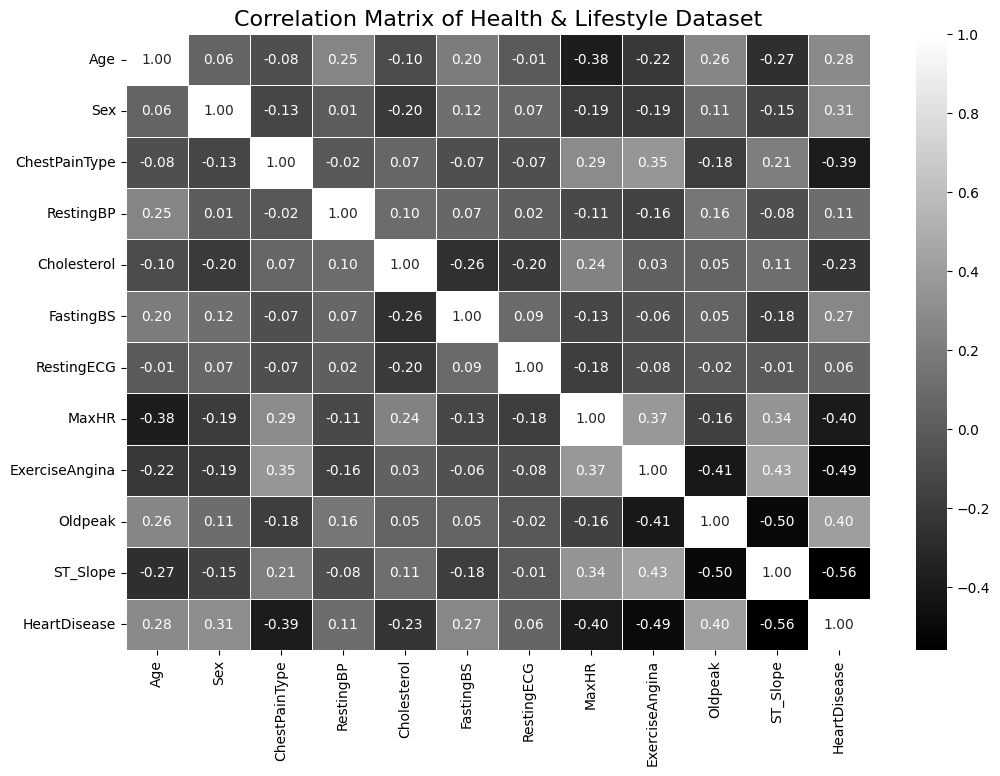

In [33]:
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="gray", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Health & Lifestyle Dataset", fontsize=16)
plt.show()

Drop the columns that are not suitable based on corelation 

In [34]:
df = df.drop(columns=['ChestPainType', 'RestingECG'])
df.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,140,289,0,172,1,0.0,1,0
1,49,0,160,180,0,156,1,1.0,0,1
2,37,1,130,283,0,98,1,0.0,1,0
3,48,0,138,214,0,108,0,1.5,0,1
4,54,1,150,195,0,122,1,0.0,1,0


Arrange the features based on correlation 

In [35]:
corr_with_target = corr_matrix['HeartDisease'].abs().sort_values(ascending=False)
print(corr_with_target)

HeartDisease      1.000000
ST_Slope          0.558771
ExerciseAngina    0.494282
Oldpeak           0.403951
MaxHR             0.400421
ChestPainType     0.386828
Sex               0.305445
Age               0.282039
FastingBS         0.267291
Cholesterol       0.232741
RestingBP         0.107589
RestingECG        0.057384
Name: HeartDisease, dtype: float64


Visualisation

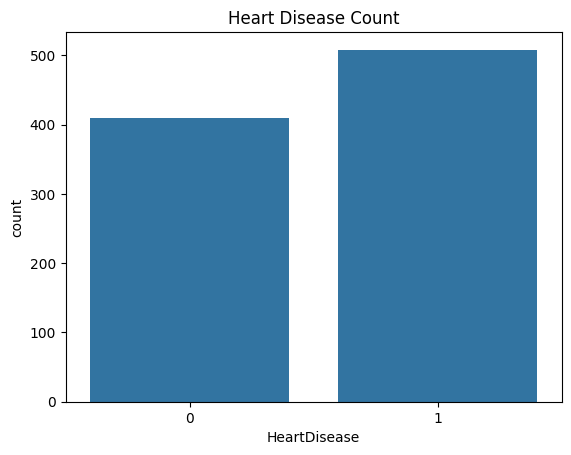

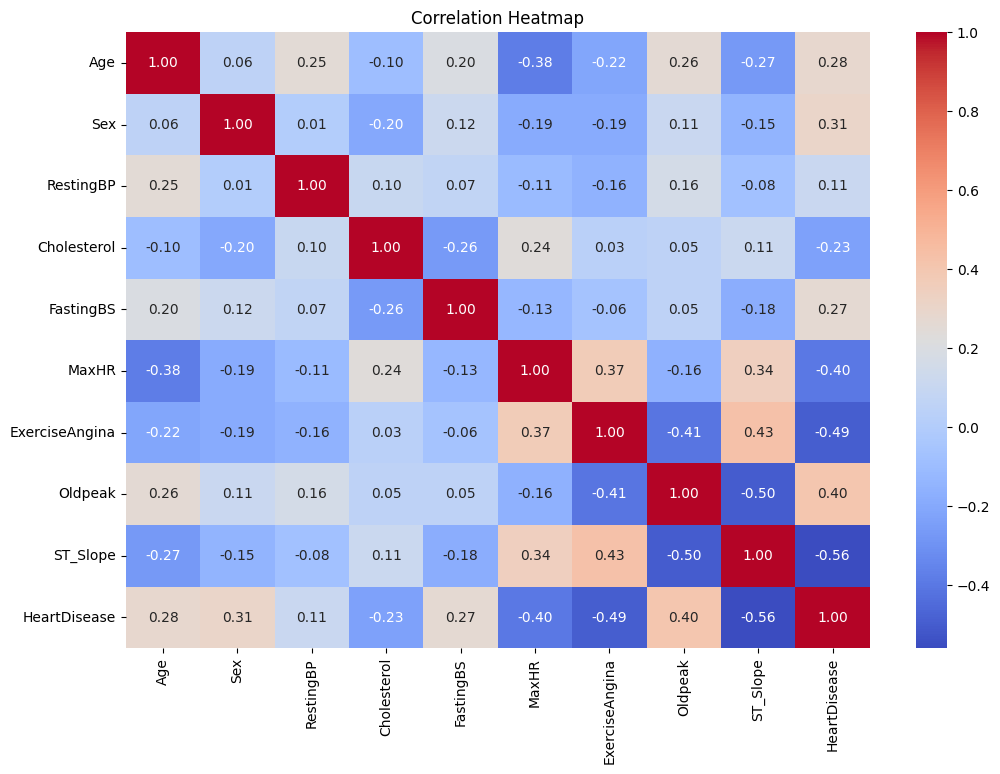

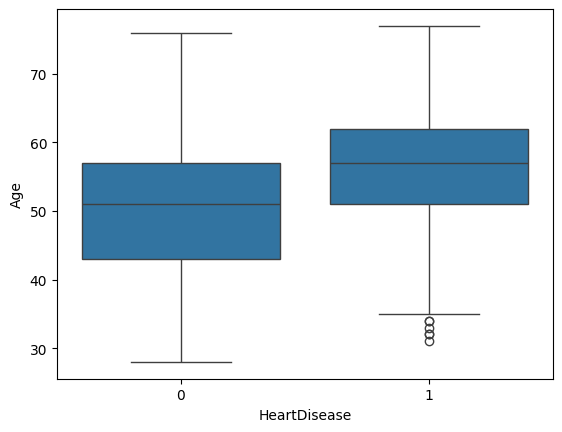

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of target
sns.countplot(x='HeartDisease', data=df)
plt.title("Heart Disease Count")
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Example: Boxplot of Age vs HeartDisease
sns.boxplot(x="HeartDisease", y="Age", data=df)
plt.show()


Feature Distributions Before Scaling

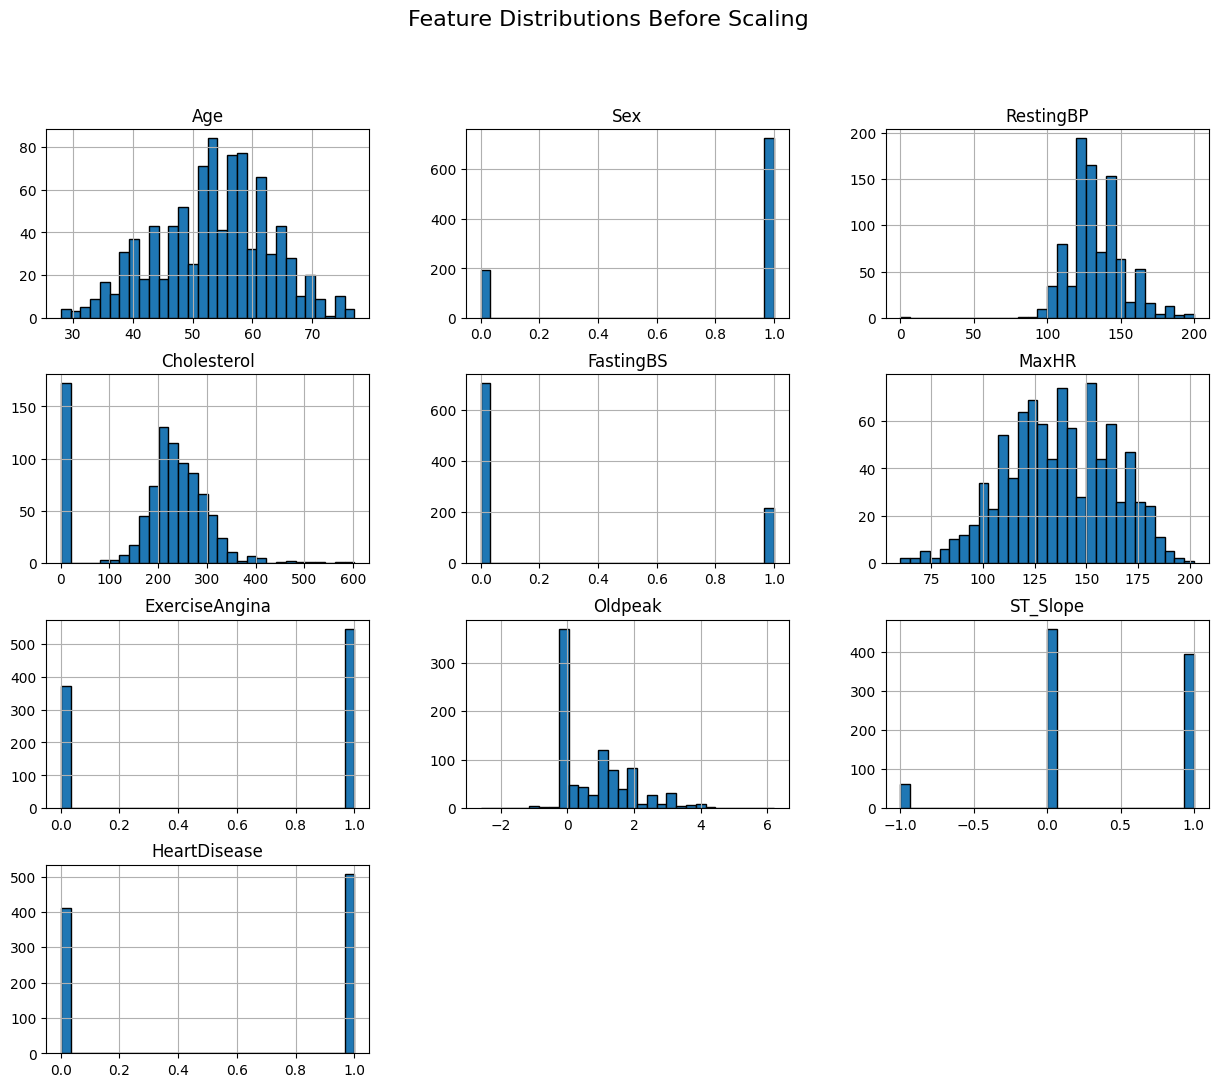

In [37]:
import matplotlib.pyplot as plt

df.hist(figsize=(15, 12), bins=30, edgecolor="black")
plt.suptitle("Feature Distributions Before Scaling", fontsize=16)
plt.show()


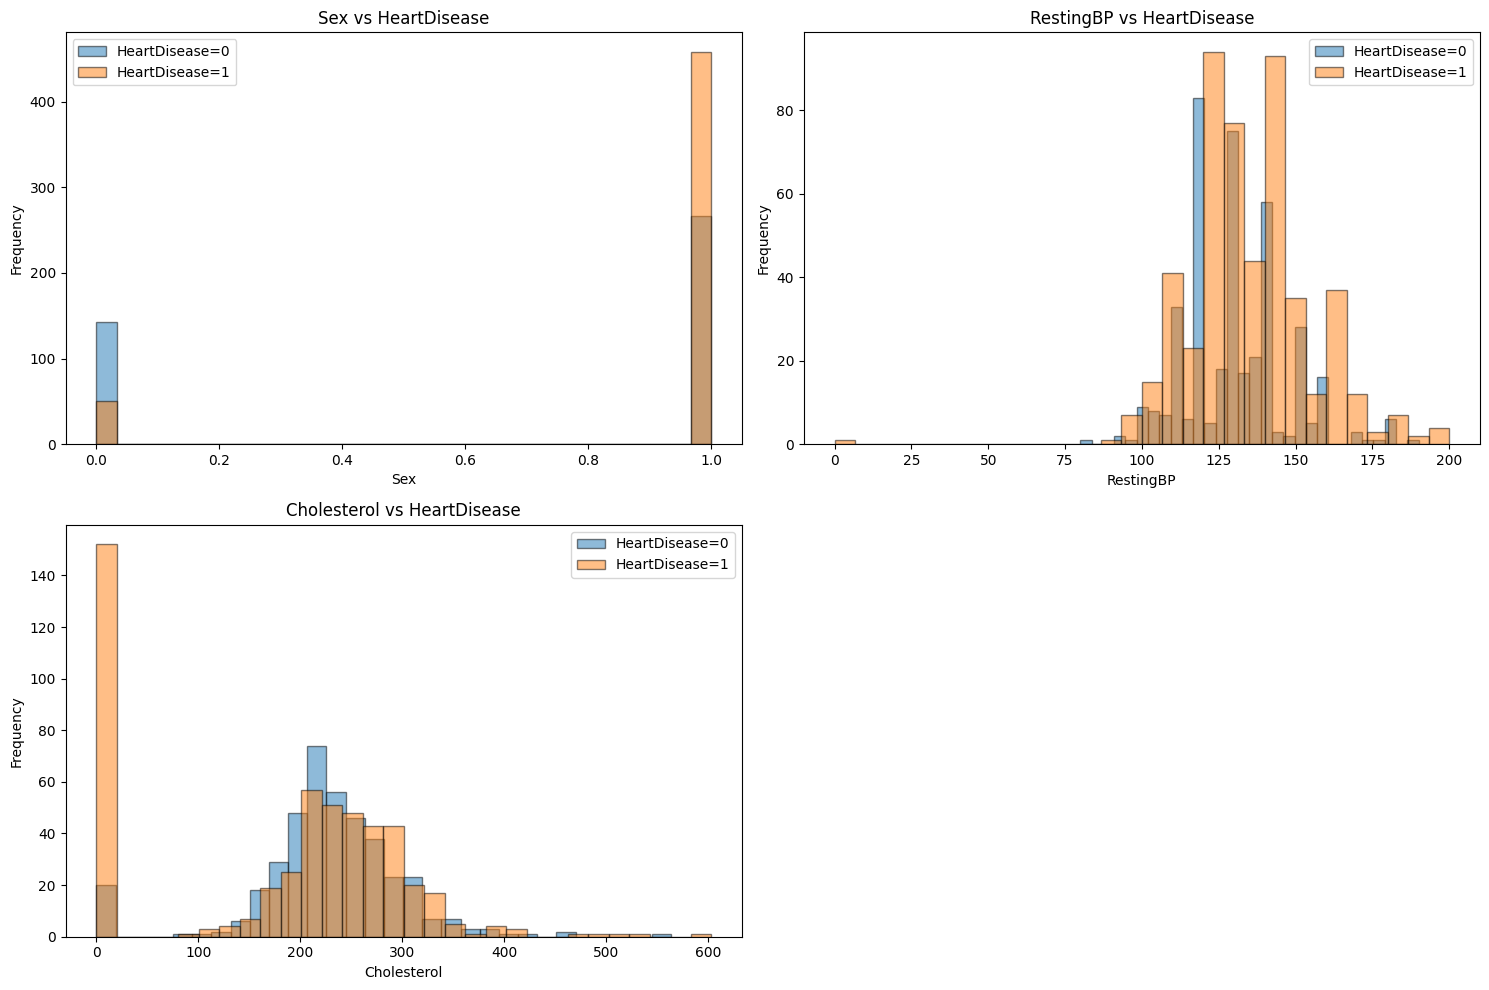

In [38]:
import matplotlib.pyplot as plt

features = ['Sex', 'RestingBP', 'Cholesterol']
target = 'HeartDisease'

plt.figure(figsize=(15, 10))

for i, col in enumerate(features, 1):
    plt.subplot(2, 2, i)
    for label in df[target].unique():
        subset = df[df[target] == label]
        plt.hist(subset[col], bins=30, alpha=0.5, label=f'HeartDisease={label}', edgecolor='k')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'{col} vs {target}')
    plt.legend()

plt.tight_layout()
plt.show()




Split Test Train and Validate

In [39]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1]  # all columns except last
y = df.iloc[:, -1]   # last column as target

# Split into training + temp (80% train, 20% temp)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Split temp into validation + test (50% val, 50% test → each 10% of total)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

# Check shapes
print("X_train:", X_train.shape)
print("X_val:", X_val.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_val:", y_val.shape)
print("y_test:", y_test.shape)


X_train.info()

X_train: (734, 9)
X_val: (92, 9)
X_test: (92, 9)
y_train: (734,)
y_val: (92,)
y_test: (92,)
<class 'pandas.core.frame.DataFrame'>
Index: 734 entries, 485 to 62
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             734 non-null    int64  
 1   Sex             734 non-null    int64  
 2   RestingBP       734 non-null    int64  
 3   Cholesterol     734 non-null    int64  
 4   FastingBS       734 non-null    int64  
 5   MaxHR           734 non-null    int64  
 6   ExerciseAngina  734 non-null    int64  
 7   Oldpeak         734 non-null    float64
 8   ST_Slope        734 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 57.3 KB


Checking Accuracy and Picking up the best model to predict our output

- Logistic Regression -

In [40]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define model
model = LogisticRegression(max_iter=1000)

# Train using all columns except target
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)
loss = model.score(X_test, y_test)
print(loss)

0.8478260869565217


- Decision Tree -


In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Define model
model = DecisionTreeClassifier(random_state=42)

# Train using all columns except target
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Score (same as accuracy)
loss = model.score(X_test, y_test)
print("Accuracy:", loss)


Accuracy: 0.7934782608695652


- Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define model
model = RandomForestClassifier(random_state=42, n_estimators=100)

# Train using all columns except target
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Score (same as accuracy)
loss = model.score(X_test, y_test)
print("Accuracy:", loss)

Accuracy: 0.8586956521739131


- SVM

In [43]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Define model
model = SVC(kernel='rbf', random_state=42)  # you can change kernel to 'linear', 'poly', 'sigmoid'

# Train using all columns except target
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Score (same as accuracy)
loss = model.score(X_test, y_test)
print("Accuracy:", loss)


Accuracy: 0.7391304347826086


- XG Boosting

In [47]:
pip install xgboost


   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
    --------------------------------------- 1.0/56.8 MB 4.8 MB/s eta 0:00:12
   - -------------------------------------- 1.8/56.8 MB 4.8 MB/s eta 0:00:12
   -- ------------------------------------- 2.9/56.8 MB 4.7 MB/s eta 0:00:12
   -- ------------------------------------- 3.9/56.8 MB 4.7 MB/s eta 0:00:12
   --- ------------------------------------ 5.0/56.8 MB 4.7 MB/s eta 0:00:11
   ---- ----------------------------------- 6.0/56.8 MB 4.7 MB/s eta 0:00:11
   ---- ----------------------------------- 7.1/56.8 MB 4.7 MB/s eta 0:00:11
   ----- ---------------------------------- 7.9/56.8 MB 4.7 MB/s eta 0:00:11
   ------ --------------------------------- 8.9/56.8 MB 4.7 MB/s eta 0:00:11
   ------- -------------------------------- 10.0/56.8 MB 4.7 MB/s eta 0:00:10
   ------- -------------------------------- 11.0/56.8 MB 4.7 MB/s eta 0:00:10
   -------- ------------------------------- 12.1/56.8 MB 4.7 MB/s eta 0:00:10
   


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Define model
model = XGBClassifier(
    random_state=42,
    eval_metric='logloss',  # avoids warnings in latest XGBoost versions
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3
)

# Train using all features
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy (XGBoost):", accuracy)


Accuracy (XGBoost): 0.8804347826086957


hence, XG Booost is the best model to pick since it has highest accuracy in comparison ot other models.

Evaluate on Validation / Test Data
Next we will confirm our chosen model that generalizes well.
We will Use our validation or test dataset (data not used in training).

Evaluate on Validation / Test Data

In [53]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Use the trained model
y_pred = model.predict(X_test)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8804347826086957
Confusion Matrix:
 [[34  7]
 [ 4 47]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.83      0.86        41
           1       0.87      0.92      0.90        51

    accuracy                           0.88        92
   macro avg       0.88      0.88      0.88        92
weighted avg       0.88      0.88      0.88        92



Fine-Tune Hyperparameters

In [54]:
from sklearn.model_selection import GridSearchCV

params = {'n_estimators':[100,200,300], 'max_depth':[3,5,7]}
grid = GridSearchCV(model, param_grid=params, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)
print(grid.best_params_)


{'max_depth': 3, 'n_estimators': 100}
